In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

## Sentiment Analysis

**Generate Word Clouds** for positive and negative sentiments using the **Sentiment140 dataset**, which contains 1.6 million tweets.  
[Sentiment140 Dataset (Kaggle)](https://www.kaggle.com/datasets/kazanova/sentiment140?resource=download)

### About the Dataset
This dataset consists of 1,600,000 tweets extracted via the Twitter API. Each tweet is annotated with a sentiment label (**0 = negative, 2 = neutral, 4 = positive**), 

### Read Data

In [45]:
# use only two column of dataset
# score: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
# text: the text of the tweet
df = pd.read_csv(
    "./data/training.1600000.processed.noemoticon.csv",
    encoding="latin-1",
    header=None,
    usecols=[0, 5],
)
df.columns = ["score", "text"]
df

,score,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


### Sample Data

In [48]:
# Sampling 10% of all tweets
neg_tweets = df[df["score"] == 0]["text"].sample(n=160000)
pos_tweets = df[df["score"] == 4]["text"].sample(n=160000)

neg_words = "".join(neg_tweets)
pos_words = "".join(pos_tweets)

### Generate WordCloud

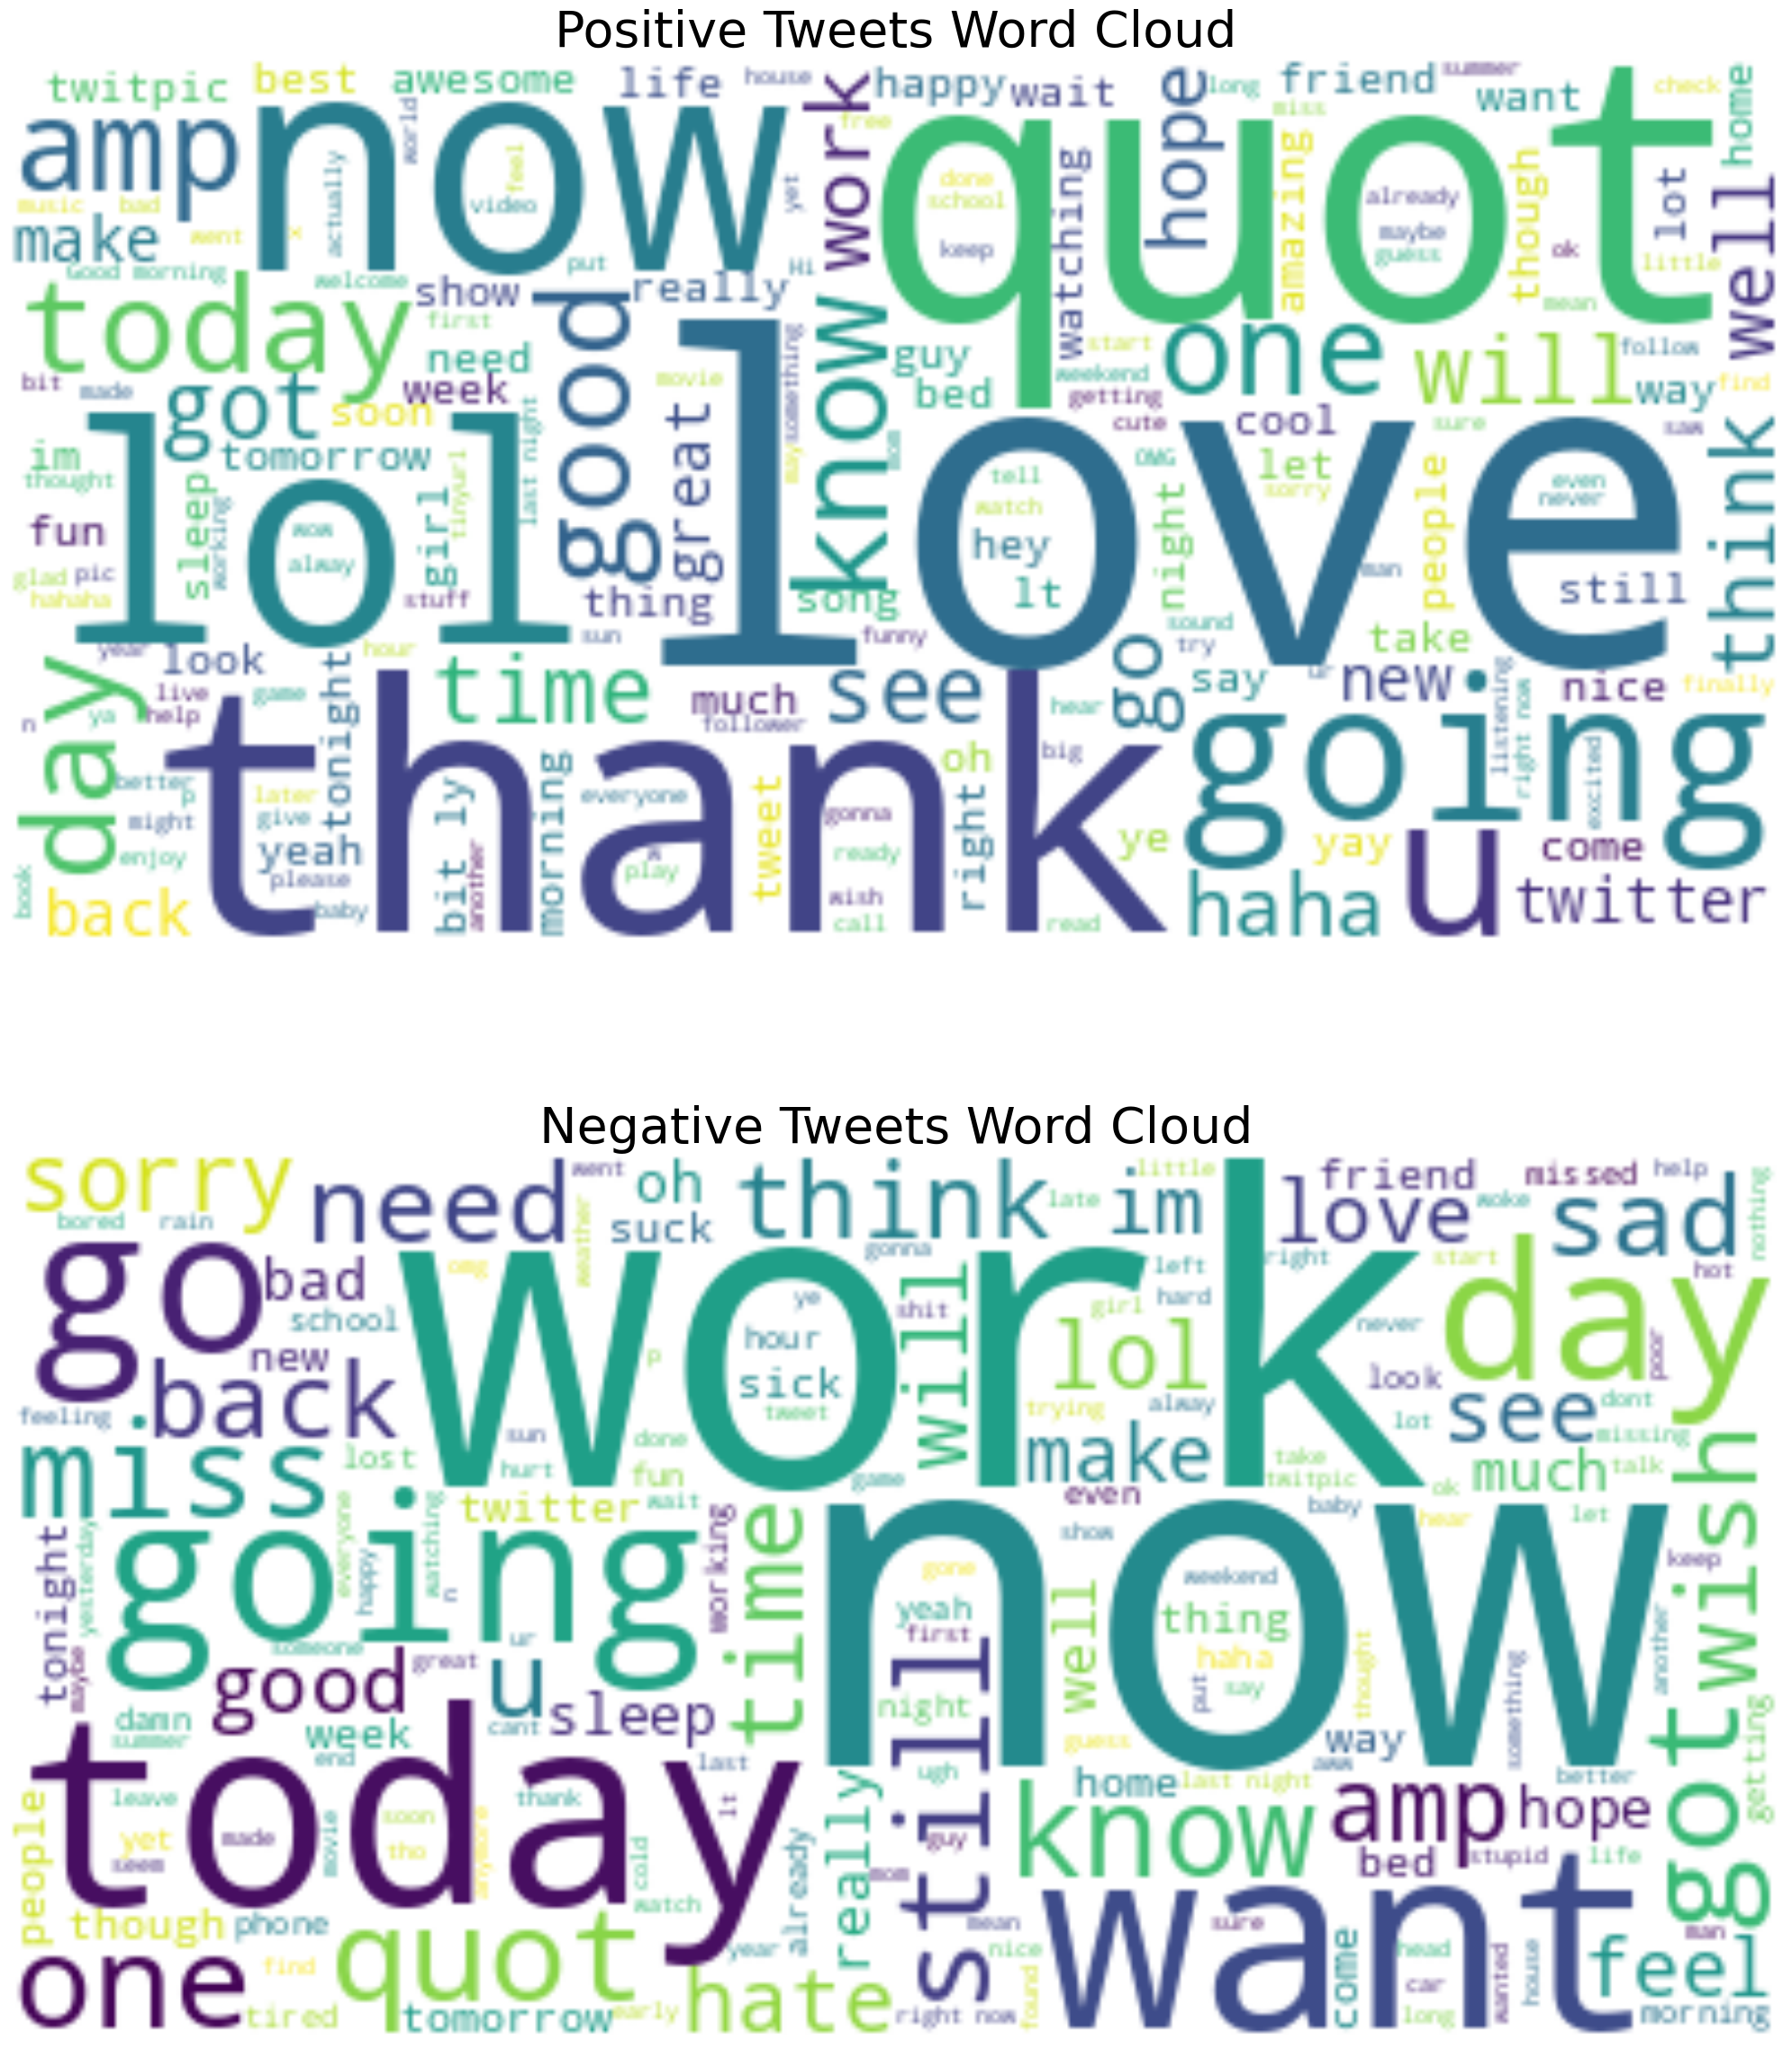

In [ ]:
# Set WordCloud parameters:
# 1. max_words=200: Limit the visualization to the top 200 most frequent words
# 2. stopwords=STOPWORDS: Exclude common words (the, a, is) provided by library
wc_settings = {"max_words": 200, "background_color": "white", "stopwords": STOPWORDS}

neg_wordcloud = WordCloud(**wc_settings).generate(neg_words)
pos_wordcloud = WordCloud(**wc_settings).generate(pos_words)


plt.figure(figsize=(20, 25))

plt.subplot(2, 1, 1)
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.title("Positive Tweets Word Cloud", fontsize=40)
plt.axis("off")

plt.subplot(2, 1, 2)
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.title("Negative Tweets Word Cloud", fontsize=40)
plt.axis("off")

plt.tight_layout()
plt.show()